In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys, os
sys.path.append('../')
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from galaxybrain import ramsey, plot_utils
from galaxybrain.data_utils import load_and_plot

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
matplotlib.rc('figure', max_open_warning = 0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# This notebook is for investigating the results of analysis 
like correlation of subset size and average spectral exponent

Some common parameters, before I was saving them as json
 - exp5: n_iters = 95; n_pc = 0.8; f_range = [0,0.4]; pc_range = [0,1.0]
 
# Loading, Saving results

In [30]:
nosum = load_and_plot('../data/experiments/NOSUM')

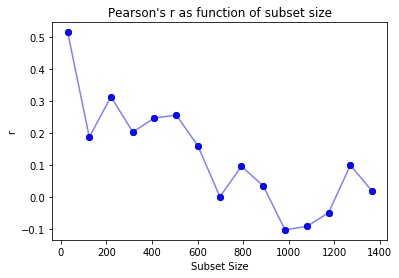

In [22]:
plot_utils.corr_plot(nosum['krebs']['all']['data']['pearson_corr1'], 'Pearson', 
                     nosum['krebs']['all']['data']['subsetsizes'],
                    nosum['krebs']['all']['data']['pearson_corr1'].shape[0])

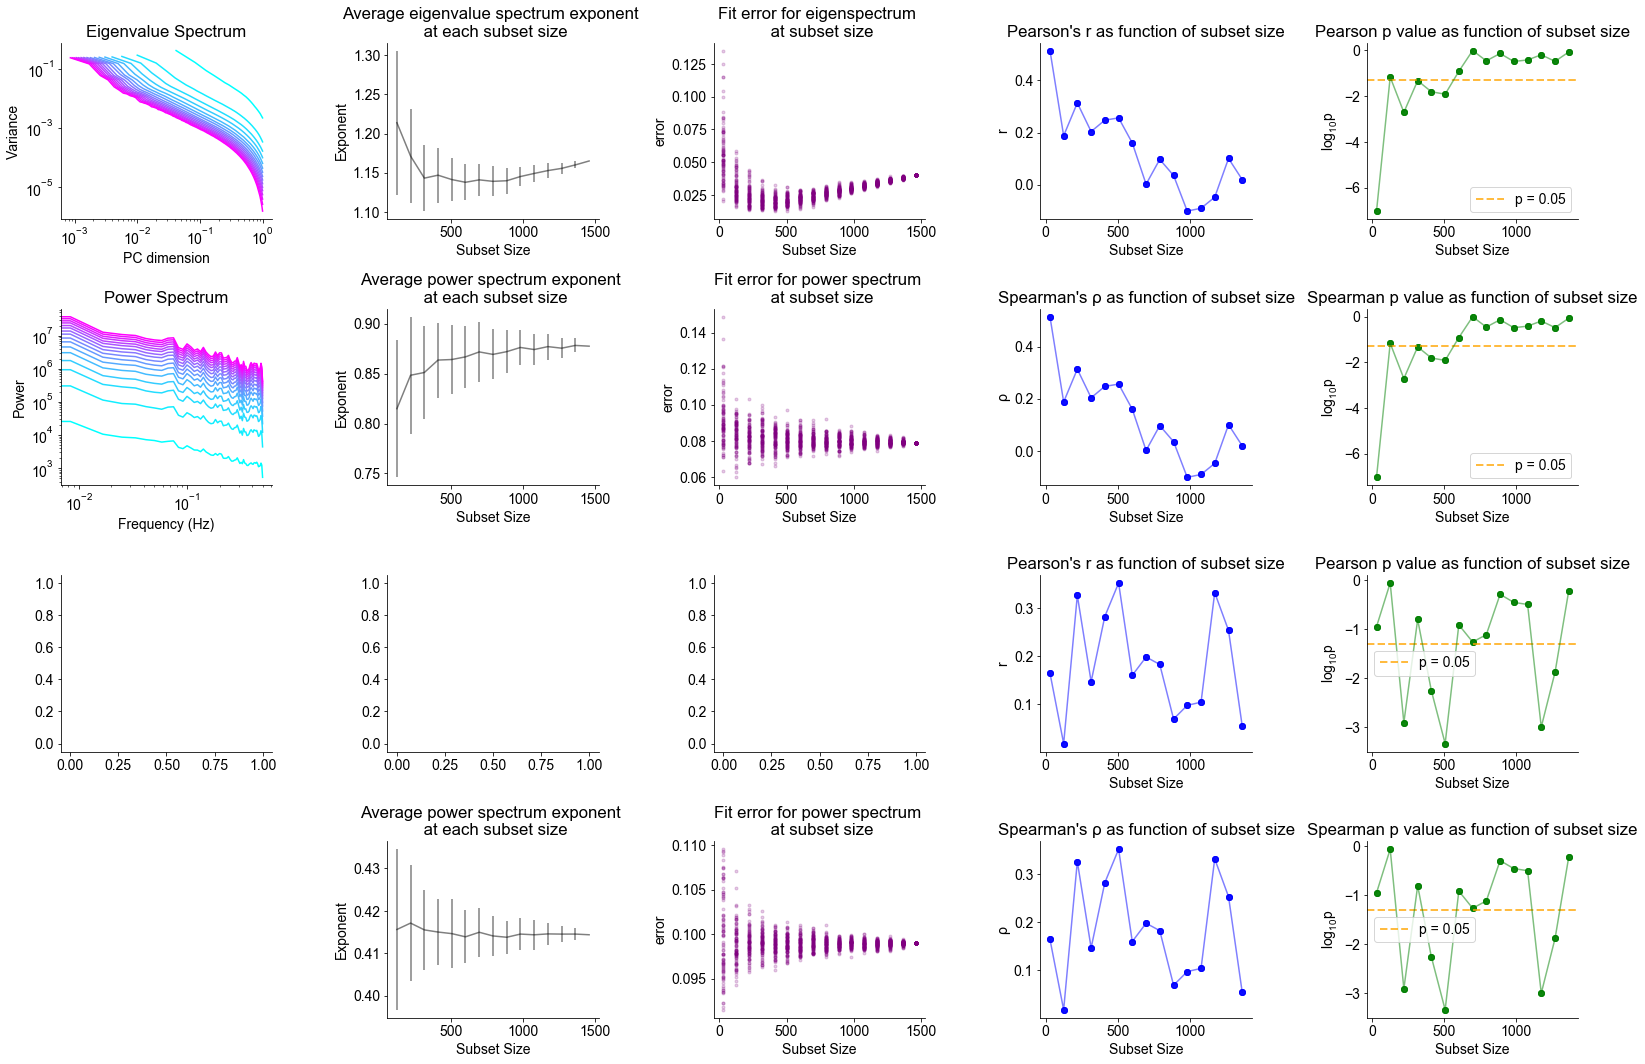

In [33]:
plot_utils.plot_all_measures(nosum['krebs']['all']['data'])

In [62]:
_=load_and_plot('../data/experiments/expSIM2', type_='sim', plot='../fig/ising')

In [11]:
_data=load_and_plot('../data/experiments/expTIMESLOPE',mice=['krebs'], type_='mouse')
data = _data['krebs'][3] # 'all' index

../galaxybrain/data_utils.py:224: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  decomp_arr = np.array(decomp_arr)


In [125]:
nd=load_and_plot('../data/experiments/NOISESIM', type_='noise', plot='../fig/noise')

In [ ]:
import os
for f in sorted(os.listdir('../data/experiments/expSIM2/')):
    plt.figure()
    try:
        ts = pd.read_csv(f'../data/experiments/expSIM2/{f}/time_series.csv')
        plt.plot(ts)
        plt.title(f)
    except:
        pass

In [35]:
data[2]['espec_exp'][:,r_i].shape

(95,)

/Users/brianbarry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


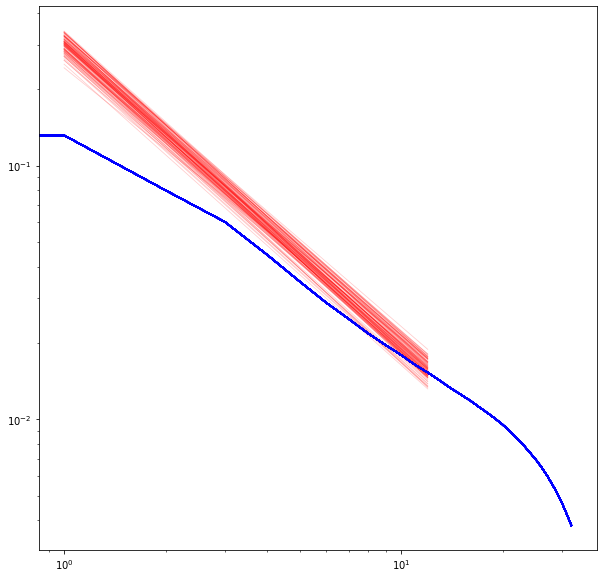

In [40]:
r_i = 2 # random index of subset size
i2 = 10
model = lambda x: (10**offset)*x**-exp
plt.figure(figsize=(10,10))
for i in range(95):
    exp = data[2]['espec_exp'][:,r_i][i] #.mean(0)
    offset = data[2]['pca_b'][:,r_i][i] #.mean(0)
    eigs = data[2]['eigs'][r_i]
    x = np.arange(*data[2]['curr_pc_range'][r_i]) #np.arange(len(eigs))
    plt.loglog(x, model(x),color='red',alpha=0.2,lw=0.8)
    plt.loglog(eigs,color='blue')

Text(0.5, 1.0, 'curr_pc_range = [0, y]')

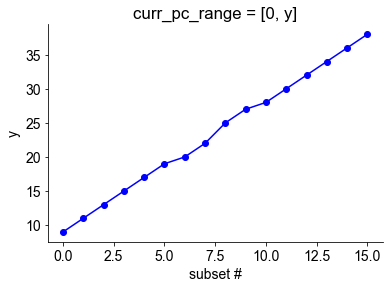

In [120]:
plt.plot(data[2]['curr_pc_range'][:,1], 'o-', color='b'); 
plt.xlabel('subset #');    plt.ylabel('y');      plt.title('curr_pc_range = [0, y]')

In [16]:
                                ####################################################
                                # (NOT NEEDED as of now) Run this to load raw data #
                                ####################################################
from galaxybrain.data_utils import load_mouse_data, return_pops
datafolder = '../data/spikes/'

all_mice = []
for i_m in range(3):
    print('Mouse ' + (str(i_m+1)))
    all_mice.append([])
    df_spk, df_info = load_mouse_data(datafolder, i_m, return_type='binned', bin_width=1)
    region_indices = {}
    for region in df_info.region.unique():
        region_indices.update({region:np.where(df_info['region'] == str(region))[0]})
        
    spk_list, region_labels = return_pops(df_spk, df_info)
    print(list(zip(region_labels, [s.shape[1] for s in spk_list])), 'Total:',sum([s.shape[1] for s in spk_list]))
    
    su_start_ind = len(region_labels)+1
    
    all_mice[i_m].append(df_spk[df_spk.columns[su_start_ind:]])
    all_mice[i_m].append(region_indices)
    
krebs = all_mice[0]; robbins = all_mice[1]; waksman = all_mice[2]

raster_dict = {'krebs': [krebs, [('all', 1462), ('CP', 176), ('HPF', 265), ('LS', 122), ('MB', 127), ('TH', 227), ('V1', 334)]],
               'robbins': [robbins, [('all', 2688), ('FrMoCtx', 647), ('HPF', 333), ('LS', 133), ('RSP', 112), ('SomMoCtx', 220), ('TH', 638), ('V1', 251), ('V2', 124)]],
               'waksman': [waksman, [('all', 2296), ('CP', 134), ('HPF', 155), ('TH', 1878)]] }
burn_in = 20 #use for later things 

Mouse 1
Grabbing Spikes...
Binning Spikes...
[('CP', 176), ('FrMoCtx', 78), ('HPF', 265), ('LS', 122), ('MB', 127), ('SC', 42), ('SomMoCtx', 91), ('TH', 227), ('V1', 334)] Total: 1462
Mouse 2
Grabbing Spikes...
Binning Spikes...
[('FrCtx', 31), ('FrMoCtx', 647), ('HPF', 333), ('LS', 133), ('MB', 40), ('RSP', 112), ('SC', 98), ('SSCtx', 50), ('SomMoCtx', 220), ('TH', 638), ('UNK', 11), ('V1', 251), ('V2', 124)] Total: 2688
Mouse 3
Grabbing Spikes...
Binning Spikes...
[('CP', 134), ('FrMoCtx', 86), ('HPF', 155), ('LH', 4), ('LS', 4), ('RSP', 10), ('SomMoCtx', 10), ('TH', 1878), ('UNK', 15)] Total: 2296


In [38]:
data = raster_dict['krebs'][0][0]
raster_curr.shape

(1301, 1462)

In [92]:
#np.array([decomp_arr[i][4] for i in range(4)], dtype=float)
np.array([pearson_r[i] for i in range(4)], dtype=float)

array([[ 0.23237682,  0.21879899,  0.08713606,  0.18678611,  0.30246361,
         0.15464726,  0.28440649,  0.17529395,  0.00908455,  0.0193869 ,
         0.02852744,  0.1825308 ,  0.30326148,  0.12628779, -0.06080627,
                nan],
       [ 0.12460806,  0.23283875,  0.31714726,  0.31461366,  0.16819709,
         0.14347704,  0.25068589,  0.18255879,  0.16794513,  0.29400896,
         0.27297032,  0.12393617,  0.03510638, -0.1225084 ,  0.19892217,
                nan],
       [ 0.24349104,  0.19839026,  0.14736842,  0.11620941,  0.26910694,
         0.17635778,  0.09767637,  0.27411814,  0.05596305,  0.31871501,
         0.13366461,  0.11891097,  0.18394457, -0.02919933, -0.09847424,
                nan],
       [ 0.07066069,  0.27413214,  0.2925252 ,  0.28159295,  0.2049972 ,
         0.05942049,  0.14098544,  0.23954367,  0.21522956,  0.24101344,
         0.22434211,  0.18202688,  0.17368421,  0.06804311,  0.15708287,
                nan]])

## Correlating subset size and spectral exponent

Calculate r (pearson, spearman) for each (mouse, region) and average (since for each datum shape is 2d, (95,16)) <br>
Keep in mind each set of exponents is averaged across 4 trials (due to `decomp_arr[:,0 or 1].mean(0)`)

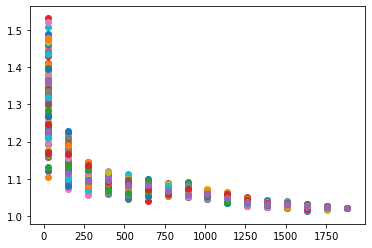

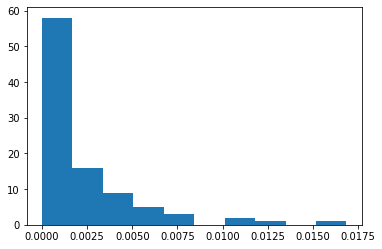

In [34]:
ca = []
for a in e_exp:
    plt.scatter(subsetsizes, a)
    ca.append(stats.pearsonr(subsetsizes, a)[1])
plt.show()
plt.hist(ca, bins=10)
plt.show()

In [3]:
mouse_means_eigx = {'pearson': ([],[]), 'spearman': ([],[])} # see below
mouse_means_psdx = {'pearson': ([],[]), 'spearman': ([],[])} # stat means ([r], [p]) for each region in each mouse, to be averaged again later 
for mouse_key in ['krebs', 'robbins', 'waksman']:
    for region in data_dict[mouse_key]:
        region_name, region_count, data = region[0], region[1], region[2]
        e_exp, p_exp = data['espec_exp'], data['psd_exp']
        subsetsizes = data['subsetsizes']
        espec_corr_array_curr = {'pearson': ([],[]), 'spearman': ([],[])}
        psd_corr_array_curr = {'pearson': ([],[]), 'spearman': ([],[])} # each correlation's array will have a correlation array and a p-value array
        for i in e_exp:
            espec_corr_array_curr['pearson'][0].append(stats.pearsonr(subsetsizes, i)[0])
            espec_corr_array_curr['pearson'][1].append(stats.pearsonr(subsetsizes, i)[1])
            
            espec_corr_array_curr['spearman'][0].append(stats.spearmanr(subsetsizes, i)[0])
            espec_corr_array_curr['spearman'][1].append(stats.spearmanr(subsetsizes, i)[1])
            
        for i in p_exp:
            psd_corr_array_curr['pearson'][0].append(stats.pearsonr(subsetsizes, i)[0])
            psd_corr_array_curr['pearson'][1].append(stats.pearsonr(subsetsizes, i)[1])
            
            psd_corr_array_curr['spearman'][0].append(stats.spearmanr(subsetsizes, i)[0])
            psd_corr_array_curr['spearman'][1].append(stats.spearmanr(subsetsizes, i)[1])
        
        region[2]['subset-exp correlation'] = {'espec': espec_corr_array_curr, 'psd': psd_corr_array_curr}
        
        #appending data for print statment below. Wow this is messy
        mouse_means_eigx['pearson'][0].append(np.mean(espec_corr_array_curr['pearson'][0])); mouse_means_eigx['spearman'][0].append(np.mean(espec_corr_array_curr['spearman'][0]));
        mouse_means_eigx['pearson'][1].append(np.mean(espec_corr_array_curr['pearson'][1])); mouse_means_eigx['spearman'][1].append(np.mean(espec_corr_array_curr['spearman'][1])) 
        
        mouse_means_psdx['pearson'][0].append(np.mean(psd_corr_array_curr['pearson'][0])); mouse_means_psdx['spearman'][0].append(np.mean(psd_corr_array_curr['spearman'][0])) 
        mouse_means_psdx['pearson'][1].append(np.mean(psd_corr_array_curr['pearson'][1])); mouse_means_psdx['spearman'][1].append(np.mean(psd_corr_array_curr['spearman'][1])) 

e_p_m, e_p_p = np.mean(mouse_means_eigx['pearson'][0]), np.mean(mouse_means_eigx['pearson'][1]); e_s_m, e_s_p = np.mean(mouse_means_eigx['spearman'][0]), np.mean(mouse_means_eigx['spearman'][1])
p_p_m, p_p_p = np.mean(mouse_means_psdx['pearson'][0]), np.mean(mouse_means_psdx['pearson'][1]); p_s_m, p_s_p = np.mean(mouse_means_psdx['spearman'][0]), np.mean(mouse_means_psdx['spearman'][1]) 
print('Eigenspectrum: avg subset-exp correlation pearson r:{:.4f}, p:{:.4f}, spearman r:{:.4f}, p:{:.4f}'.format(e_p_m, e_p_p, e_s_m, e_s_p))
print('PSD: avg subset-exp correlation pearson r:{:.4f}, p:{:.4f}, spearman r:{:.4f}, p:{:.4f}'.format(p_p_m, p_p_p, p_s_m, p_s_p))

Eigenspectrum: avg subset-exp correlation pearson r:-0.6349, p:0.0359, spearman r:-0.6553, p:0.0640
PSD: avg subset-exp correlation pearson r:0.4077, p:0.1540, spearman r:0.4169, p:0.1823


<function matplotlib.pyplot.show(*args, **kw)>

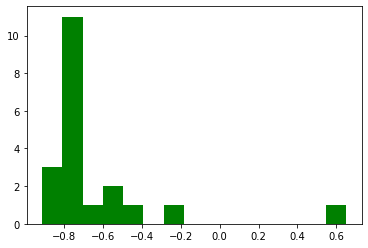

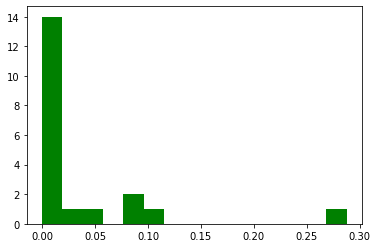

In [6]:
plt.hist(mouse_means_eigx['pearson'][0], bins =15, color='g'); plt.show
plt.figure()
plt.hist(mouse_means_eigx['pearson'][1], bins =15, color='g'); plt.show


# Power law fit

goodness of power law fit increases, variability of goodness of fit decreases <br>
VIZ: same idea: also look at avg r2, std dev

In [36]:
r2_metadata = {'eig':([],[]),'psd':([],[])}
for mouse_key in ['krebs', 'robbins', 'waksman']:
    for region in data_dict[mouse_key]:
        data = region[2]
        subsetsizes = data['subsetsizes']
        e_r2, p_r2 = data['space_r2'], data['time_r2'] #goodness of fits
        r2_metadata['eig'][0].append(e_r2.mean(0))
        r2_metadata['eig'][1].append(e_r2.std(0))
        
        r2_metadata['psd'][0].append(p_r2.mean(0))
        r2_metadata['psd'][1].append(p_r2.std(0))

Text(0.5, 0.04, '% neurons')

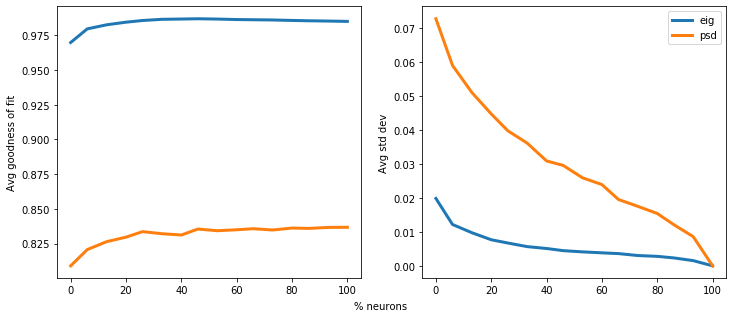

In [52]:
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(np.linspace(0,100,16, dtype=int), np.array(r2_metadata['eig'][0]).mean(0), linewidth = 3)
plt.plot(np.linspace(0,100,16, dtype=int), np.array(r2_metadata['psd'][0]).mean(0), linewidth = 3)
plt.ylabel('Avg goodness of fit')

plt.subplot(1,2,2)
plt.plot(np.linspace(0,100,16, dtype=int), np.array(r2_metadata['eig'][1]).mean(0), linewidth = 3)
plt.plot(np.linspace(0,100,16, dtype=int), np.array(r2_metadata['psd'][1]).mean(0), linewidth = 3)
plt.ylabel('Avg std dev')
plt.legend(labels = ['eig','psd'])
fig.text(0.5, 0.04, '% neurons', ha='center')

In [6]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fig=plt.figure()
# Create a continuous norm to map from data points to colors
cl = LineCollection(segments, cmap='viridis', norm=plt.Normalize(0.0, 1.0))
fig.add_collection(cl)

AttributeError: 'Figure' object has no attribute 'add_collection'

<Figure size 432x288 with 0 Axes>